# Predicting Default on Credit Card Payment using Extreme Gradient Boosted Tree Classifier
## 1) Problem
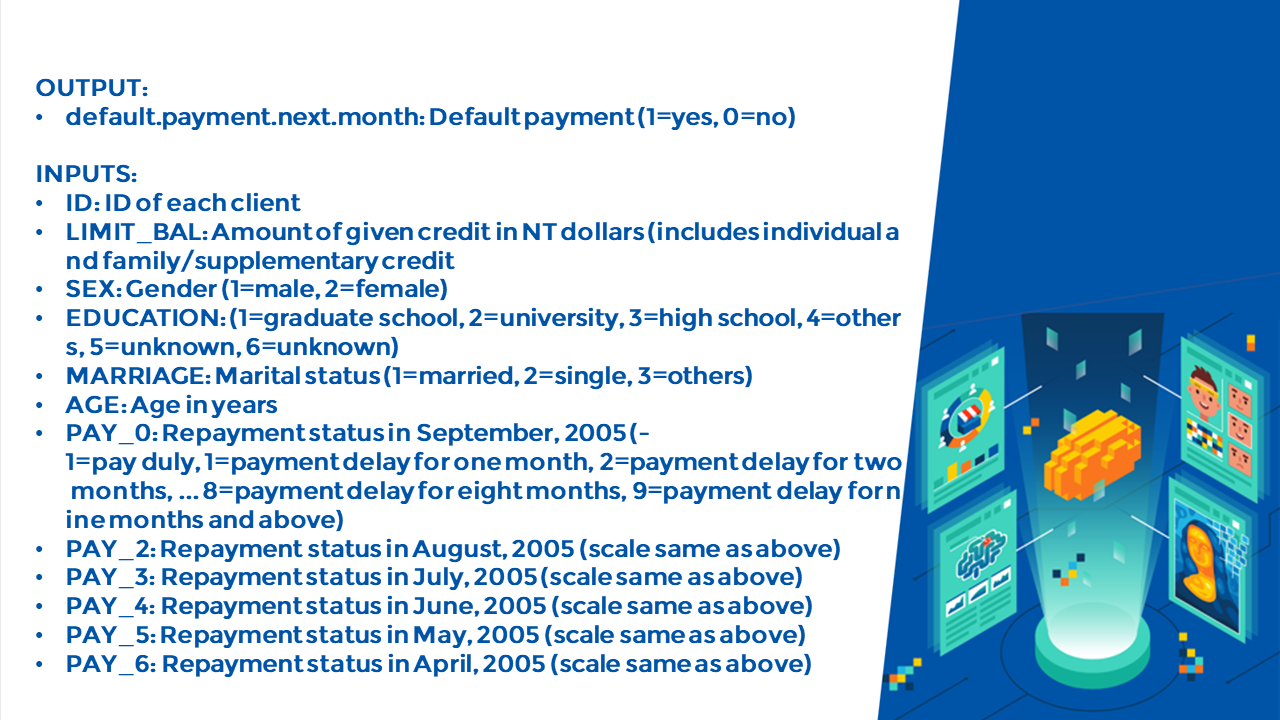

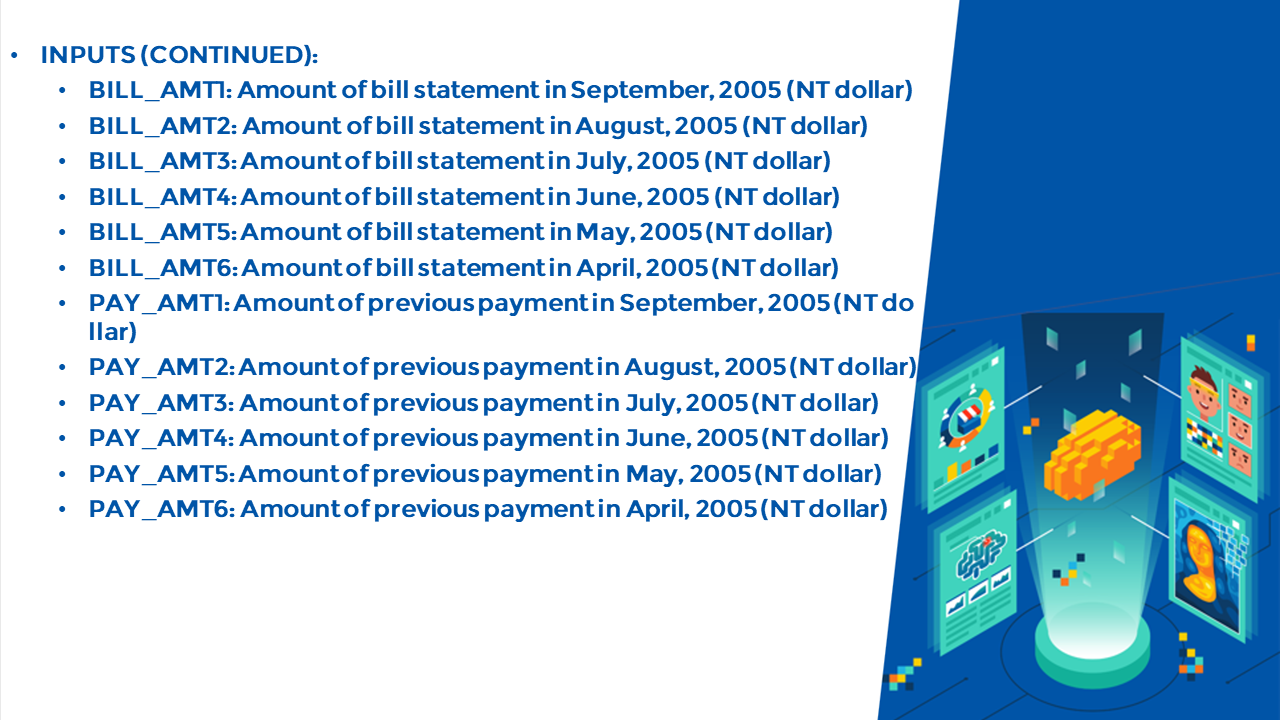

We need to predict whether or not the customer will default on the next credit card payment

## 2) Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import dataset, because in same folder, use name

creditcard_df = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
creditcard_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
creditcard_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
creditcard_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 3) Explore and Visualize

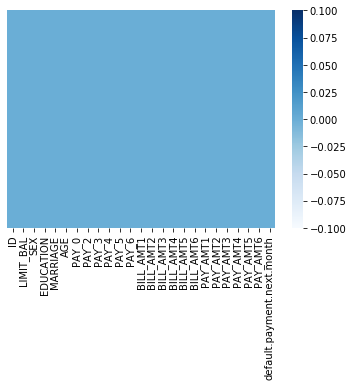

In [8]:
# Is the dataset contain null (using seaborn)

sns.heatmap(creditcard_df.isnull(), yticklabels = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1f8ec3fd0>,
      dtype=object)

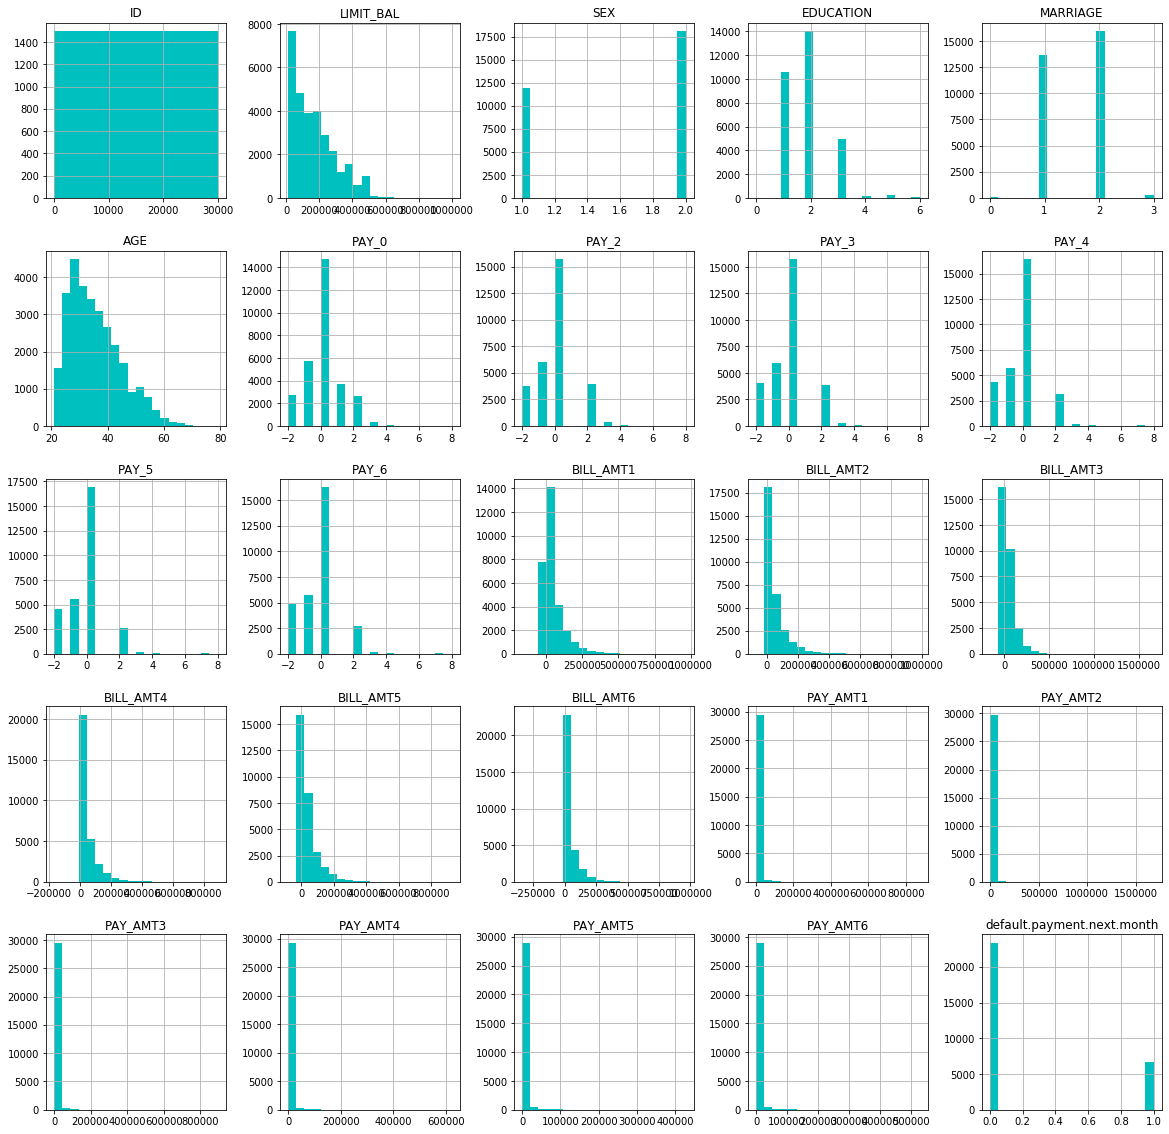

In [9]:
creditcard_df.hist(bins = 20, figsize = (20,20), color = 'c')

From that graph, it tells that we're dealing with imbalanced data (look at default payment next month section), the number who not default are more than the cust who not default

In [10]:
creditcard_df.drop('ID', axis=1, inplace=True)
creditcard_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [11]:
# Divide The Dataset into 2 groups, the one who default, and the one who not default
cc_default_df = creditcard_df[creditcard_df['default.payment.next.month'] == 1]
cc_nodefault_df = creditcard_df[creditcard_df['default.payment.next.month'] == 0]

Try to count:
- total
- number of cust who default
- percentage of cust who default
- number of cust who not default
- percentage of cust who not default

In [12]:
print('Total customer: ', len(creditcard_df))

print('Number of customer who default: ', len(cc_default_df))
print('Percentage of customer who default: ', (len(cc_default_df) / len(creditcard_df)) * 100, '%')

print('Number of customer who not default: ', len(cc_nodefault_df))
print('Percentage of customer who not default: ', (len(cc_nodefault_df) / len(creditcard_df)) * 100, '%')

Total customer:  30000
Number of customer who default:  6636
Percentage of customer who default:  22.12 %
Number of customer who not default:  23364
Percentage of customer who not default:  77.88000000000001 %


See.. the number of customer who default is significantly less than who not default

In [13]:
# Details of default customers:

cc_default_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,...,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,6636.0
mean,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.0
std,115378.540571,0.495520,0.728096,0.525433,9.693438,1.383252,1.502243,1.499401,1.508535,1.482833,...,64351.076092,61424.695949,59579.674268,9544.252427,11737.986064,12959.624486,11191.973162,11944.731175,13464.005894,0.0
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-65167.000000,-53007.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,...,2141.500000,1502.750000,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,90000.000000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,19119.500000,18478.500000,18028.500000,1636.000000,1533.500000,1222.000000,1000.000000,1000.000000,1000.000000,1.0
75%,200000.000000,2.000000,2.000000,2.000000,42.000000,2.000000,2.000000,2.000000,2.000000,0.000000,...,50175.750000,47853.000000,47424.000000,3478.250000,3309.750000,3000.000000,2939.250000,3000.000000,2974.500000,1.0
max,740000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,548020.000000,547880.000000,514975.000000,300000.000000,358689.000000,508229.000000,432130.000000,332000.000000,345293.000000,1.0


In [14]:
# Detals of not default customers:

cc_nodefault_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,23364.000000,...,23364.000000,23364.000000,23364.000000,23364.000000,2.336400e+04,23364.000000,23364.000000,23364.000000,23364.000000,23364.0
mean,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,43611.165254,40530.445343,39042.268704,6307.337357,6.640465e+03,5753.496833,5300.529319,5248.220296,5719.371769,0.0
std,131628.359660,0.486806,0.806780,0.520794,9.077355,0.952464,1.035191,1.048378,1.013162,0.977591,...,64324.796730,60617.268112,59547.015717,18014.508990,2.530226e+04,18684.255937,16689.778060,16071.667860,18792.950473,0.0
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,70000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1823.000000,1265.500000,1163.750000,1.005000e+03,600.000000,390.000000,369.000000,300.000000,0.0
50%,150000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,17998.000000,16679.000000,2459.500000,2.247500e+03,2000.000000,1734.000000,1765.000000,1706.000000,0.0
75%,250000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55988.000000,51135.250000,49842.500000,5606.250000,5.311250e+03,5000.000000,4602.000000,4600.000000,4545.000000,0.0
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,0.0


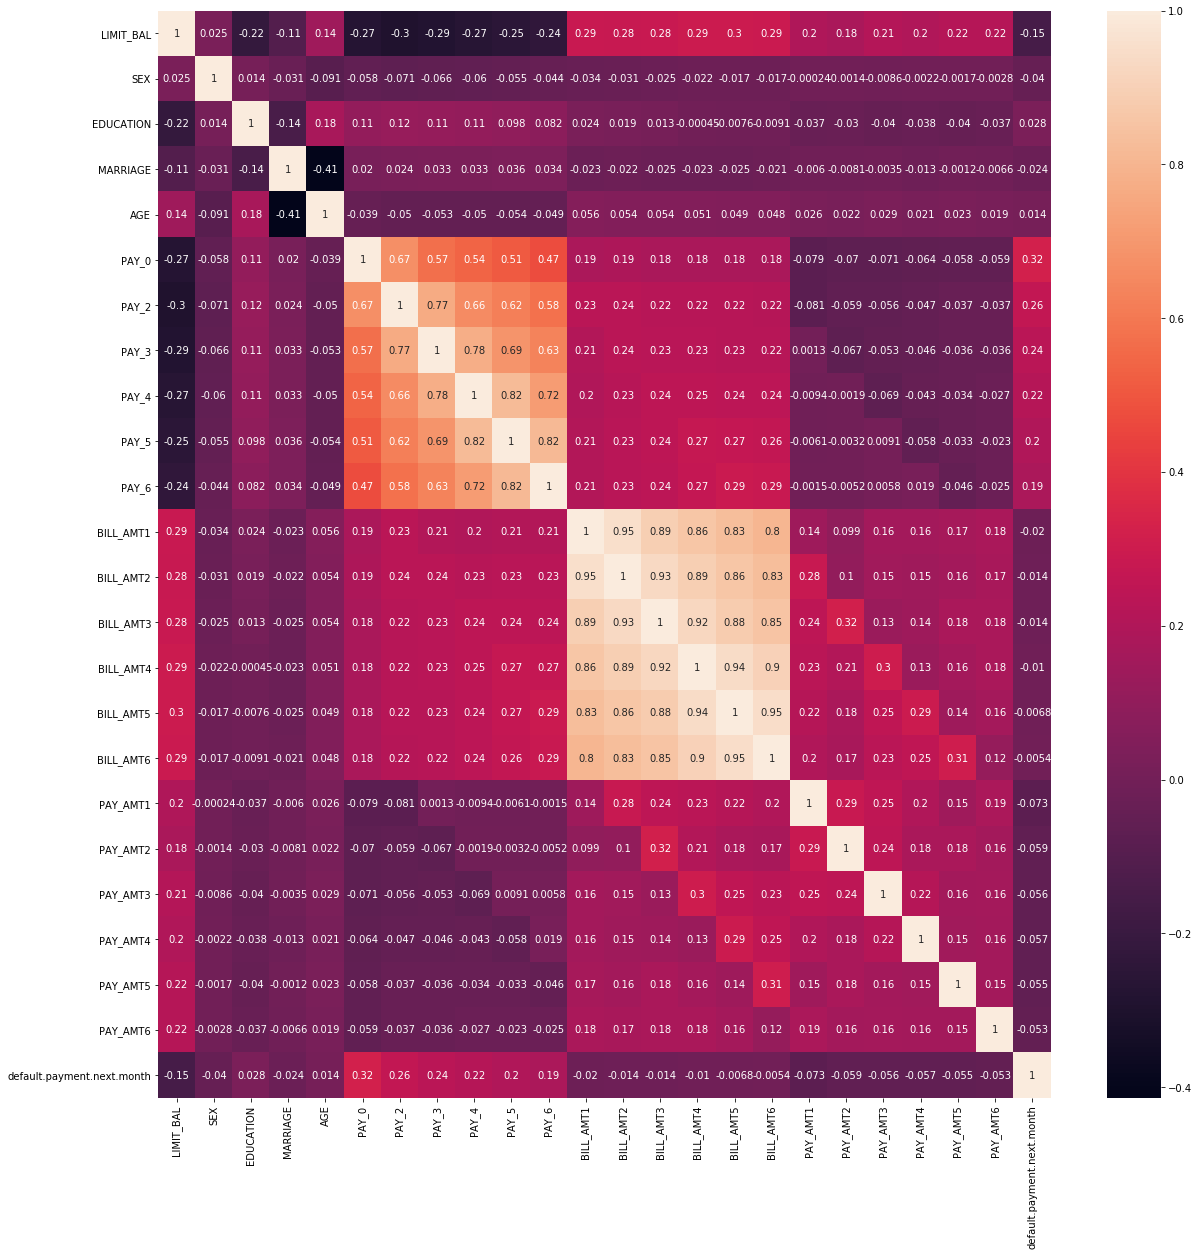

In [15]:
# Lets check the correlation
plt.figure(figsize=(20,20))
sns.heatmap(creditcard_df.corr(), annot=True)

For example:
- People who PAY0 (September) will positively correlated with PAY2 (August), that means, they will have same behavior in payment
- Age and Marriage have negative correlation

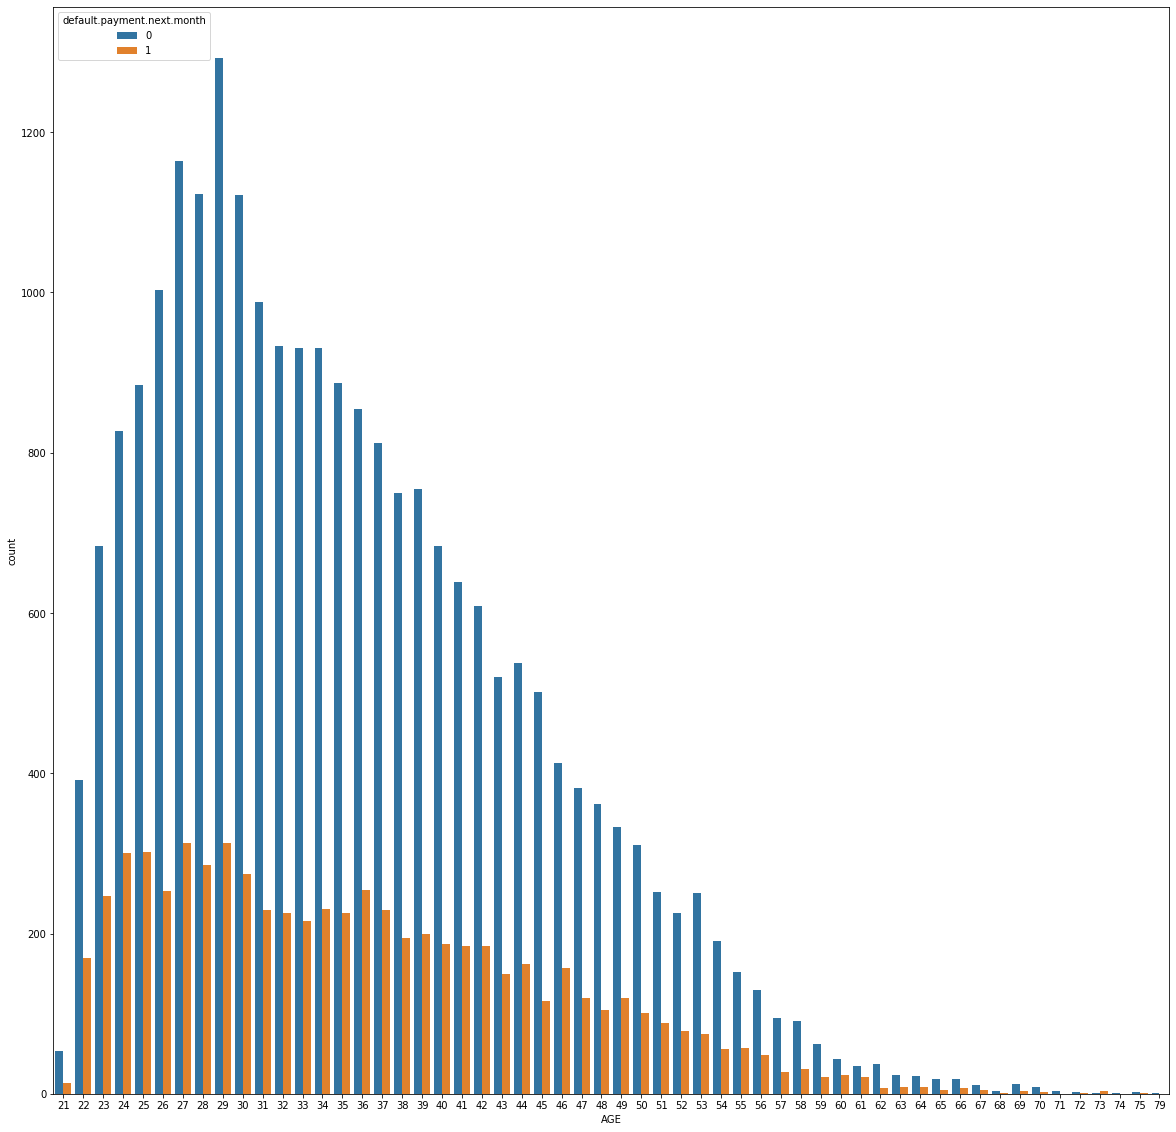

In [16]:
plt.figure(figsize=(20,20))
sns.countplot(data = creditcard_df,
             x = 'AGE',
             hue = 'default.payment.next.month')

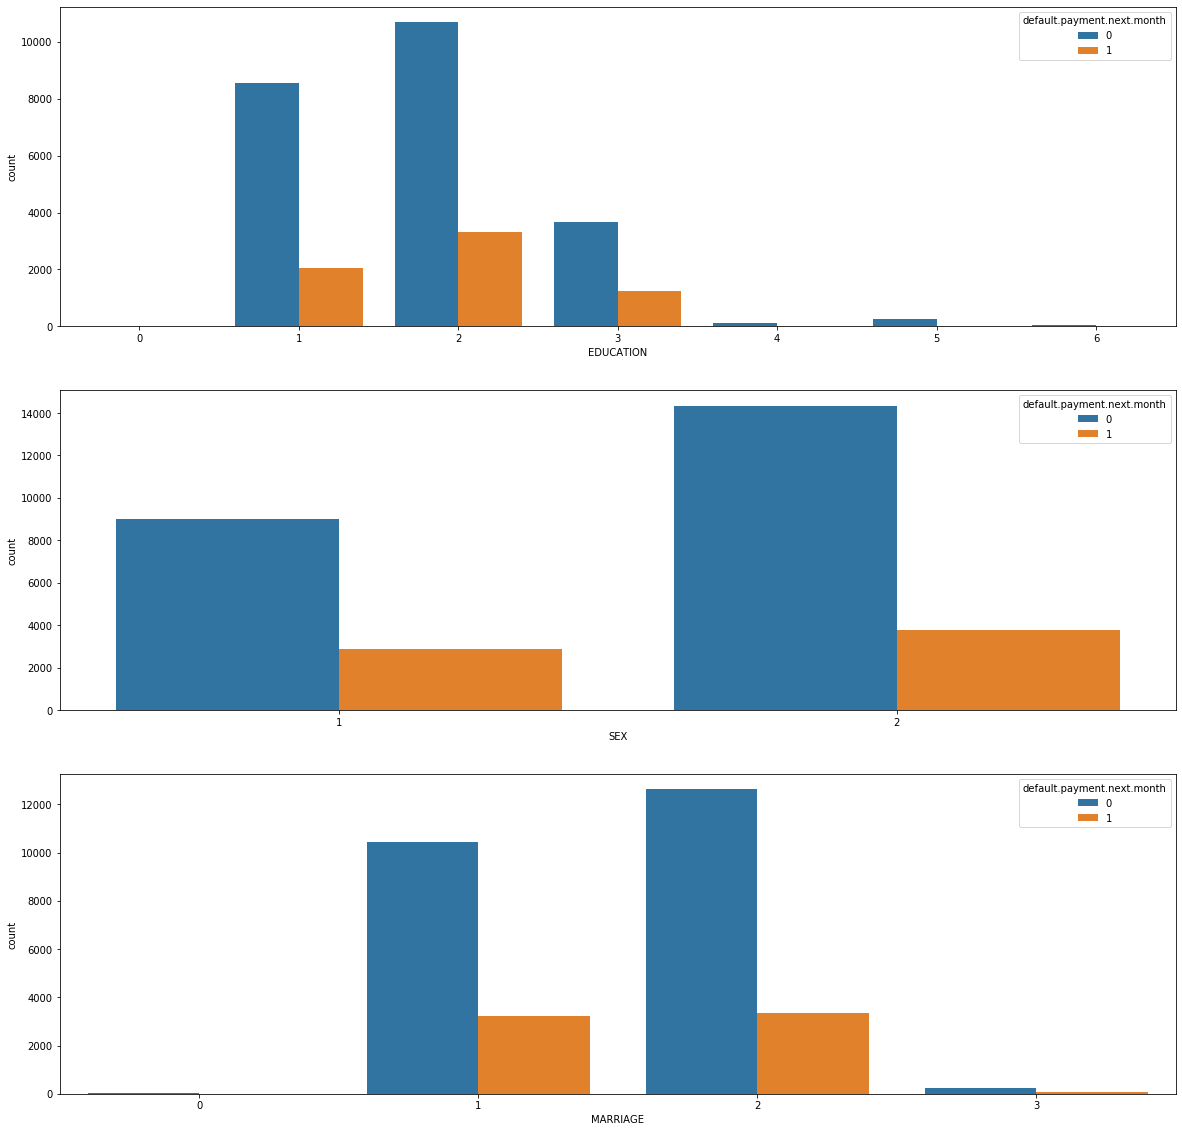

In [17]:
# Check others

plt.figure(figsize=(20,20))

# How about education?
plt.subplot(3,1,1)
sns.countplot(data = creditcard_df,
             x = 'EDUCATION',
             hue = 'default.payment.next.month')

# The sex?
plt.subplot(3,1,2)
sns.countplot(data = creditcard_df,
             x = 'SEX',
             hue = 'default.payment.next.month')

# And marital status?
plt.subplot(3,1,3)
sns.countplot(data = creditcard_df,
             x = 'MARRIAGE',
             hue = 'default.payment.next.month')

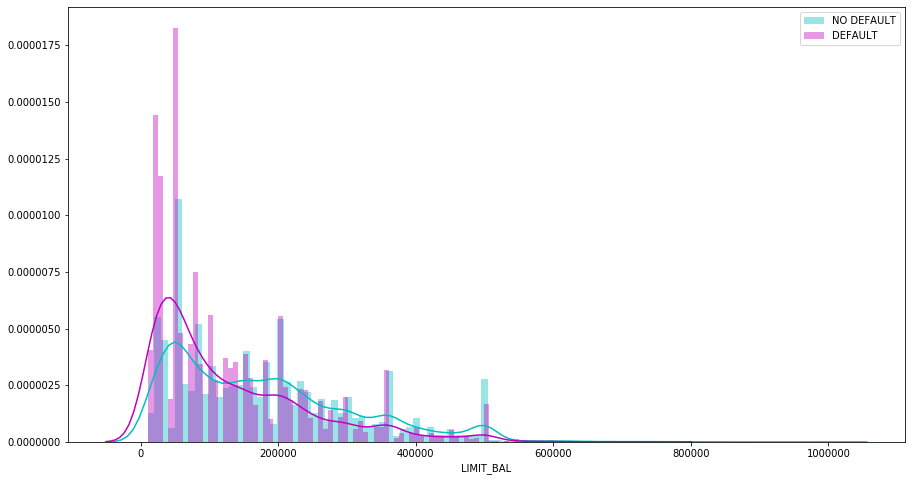

In [18]:
# Check the distribution of the limit balance
plt.figure(figsize=(15,8))

# Let's look the probability density of Limit Balance between Default and non Default customer
sns.distplot(cc_nodefault_df['LIMIT_BAL'],
            bins = 100,
            color = 'c',
            label = 'NO DEFAULT')

sns.distplot(cc_default_df['LIMIT_BAL'],
            bins = 100,
            color = 'm',
            label = 'DEFAULT')

plt.legend()

The distribution is not really significant, below 200000, Default has higher area covered. For >200000, No default has higher area covered

Text(0.5, 0, 'Amount of bill statement in September, 2005 (NT dollar)')

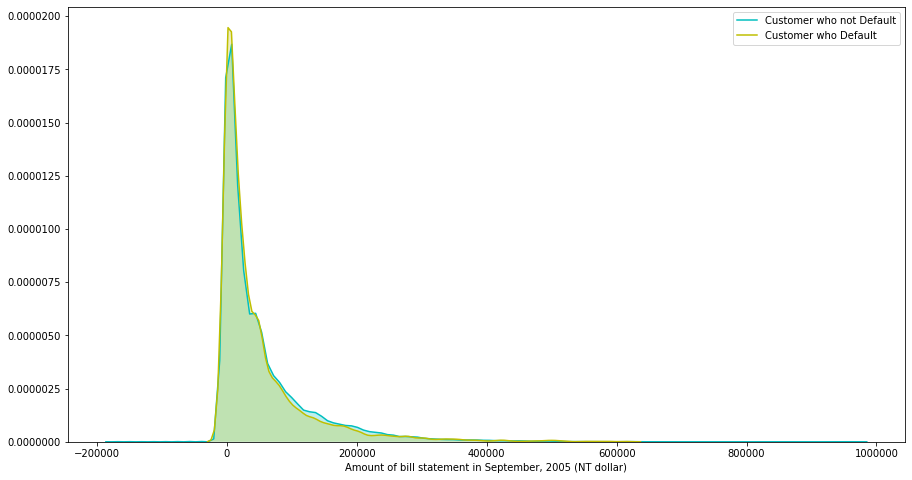

In [19]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 

# Check the bill amount 1
plt.figure(figsize=(15,8))

sns.kdeplot(cc_nodefault_df['BILL_AMT1'],
           label = 'Customer who not Default',
           shade = True,
           color = 'c')

sns.kdeplot(cc_default_df['BILL_AMT1'],
           label = 'Customer who Default',
           shade = True,
           color = 'y')

plt.xlabel('Amount of bill statement in September, 2005 (NT dollar)')

The bill statement was not really significantly different

Text(0.5, 0, 'PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)')

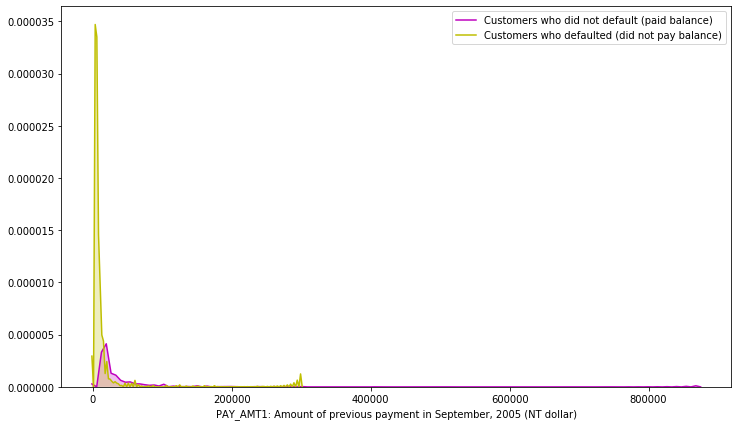

In [20]:
plt.figure(figsize=(12,7))

sns.kdeplot(cc_nodefault_df['PAY_AMT1'], 
            label = 'Customers who did not default (paid balance)', 
            shade = True, 
            color = 'm')

sns.kdeplot(cc_default_df['PAY_AMT1'], 
            label = 'Customers who defaulted (did not pay balance)', 
            shade = True, 
            color = 'y')

plt.xlabel('PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)')
#plt.xlim(0, 200000)

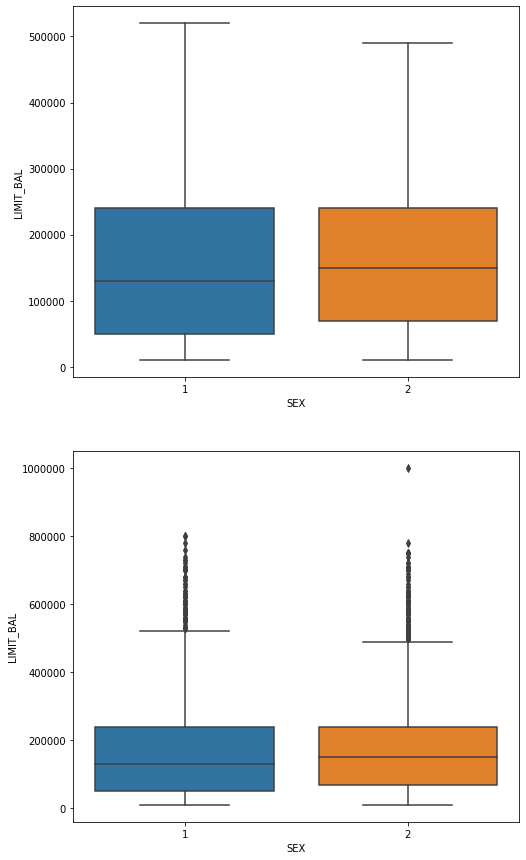

In [21]:
# Sex and Limit Balance

plt.figure(figsize=(8,15))

plt.subplot(2,1,1)
sns.boxplot(data=creditcard_df,
           x = 'SEX',
           y = 'LIMIT_BAL',
           showfliers = False)

plt.subplot(2,1,2)
sns.boxplot(data=creditcard_df,
           x = 'SEX',
           y = 'LIMIT_BAL')

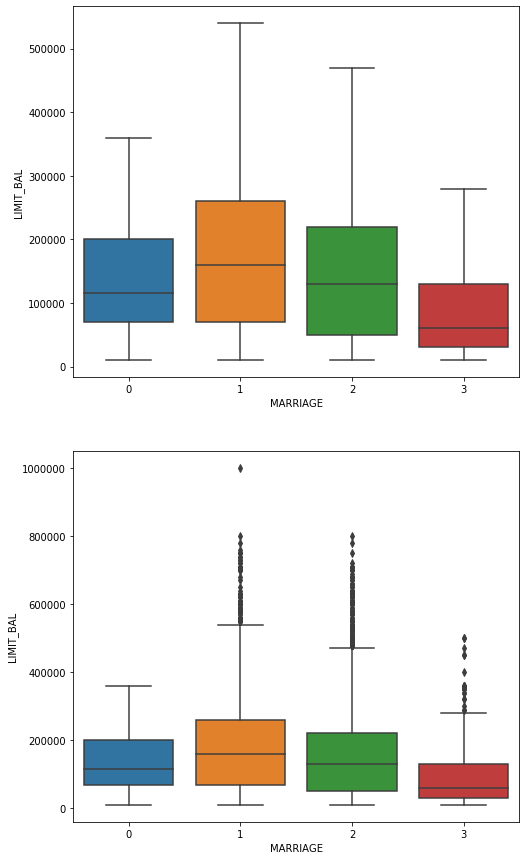

In [22]:
# Marriage and Limit Balance

plt.figure(figsize=(8,15))

plt.subplot(2,1,1)
sns.boxplot(data=creditcard_df,
           x = 'MARRIAGE',
           y = 'LIMIT_BAL',
           showfliers = False)

plt.subplot(2,1,2)
sns.boxplot(data=creditcard_df,
           x = 'MARRIAGE',
           y = 'LIMIT_BAL')

## 4) Data Cleaning, and Split

In [23]:
creditcard_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [24]:
cat = [cols for cols in creditcard_df.columns if cols in ['SEX', 'EDUCATION', 'MARRIAGE']]
cat

['SEX', 'EDUCATION', 'MARRIAGE']

In [25]:
num = [cols for cols in creditcard_df.columns if cols not in cat]
num

['LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [26]:
# because default.payment.next.month is our target, remove it from num section
num.remove('default.payment.next.month')
num

['LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [27]:
X_cat = creditcard_df[cat]
X_cat

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [28]:
# perform one hot encoder...

from sklearn.preprocessing import OneHotEncoder
OH = OneHotEncoder()
X_cat = OH.fit_transform(X_cat).toarray()

In [29]:
X_cat.shape

(30000, 13)

In [30]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
X_numerical = creditcard_df[num]
X_numerical

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [32]:
X = pd.concat([X_cat, X_numerical], axis = 1)
X

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [33]:
y = creditcard_df['default.payment.next.month']
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

## 5) Train Locally

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [95]:
X_train.shape

(21600, 33)

In [96]:
X_test.shape

(6000, 33)

In [97]:
X_val.shape

(2400, 33)

In [37]:
!pip install xgboost

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached xgboost-1.4.2-py3-none-manylinux2010_x86_64.whl (166.7 MB)


In [98]:
# Import and train

import xgboost as xgb


model = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.05, max_depth = 20, n_estimators = 300)

model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=2, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [99]:
y_pred = model.predict(X_test)

In [100]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_test, y_pred)))

Accuracy 80.01666666666667 %


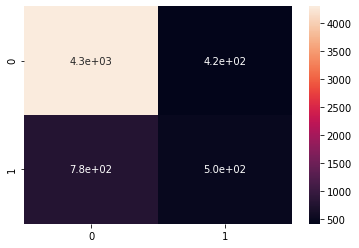

In [102]:
# Testing Set Performance

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4713
           1       0.55      0.39      0.46      1287

    accuracy                           0.80      6000
   macro avg       0.70      0.65      0.67      6000
weighted avg       0.78      0.80      0.79      6000



## 6) Optimize using GridSearch

In [104]:
param_grid = {
    'gamma': [0.5, 1, 5], # regularization parameter 
    'subsample': [0.6, 0.8, 1.0], # % of rows taken to build each tree
    'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
    'max_depth': [3, 4, 5] # depth of each tree
        }

In [48]:
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(learning_rate=0.01, n_estimators=250, objective='binary:logistic')

grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[05:55:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.813, total=   3.7s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[05:55:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.820, total=   3.5s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[05:55:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.822, total=   3.5s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[05:55:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.828, total=   3.6s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[05:55:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.827, total=   3.6s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[05:55:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8, score=0.813, total=   3.6s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 39.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=N

In [105]:
grid.best_params_

{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 4, 'subsample': 1.0}

In [106]:
y_predict_optim = grid.predict(X_test)

In [107]:
y_predict_optim

array([0, 0, 0, ..., 1, 0, 0])

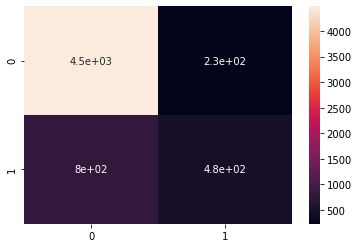

In [108]:
# See confusion Matrix

cm = confusion_matrix(y_test, y_predict_optim)
sns.heatmap(cm, annot=True)

In [109]:
print(classification_report(y_test, y_predict_optim))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4713
           1       0.68      0.38      0.48      1287

    accuracy                           0.83      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



## 7) AWS SageMaker XGBoost
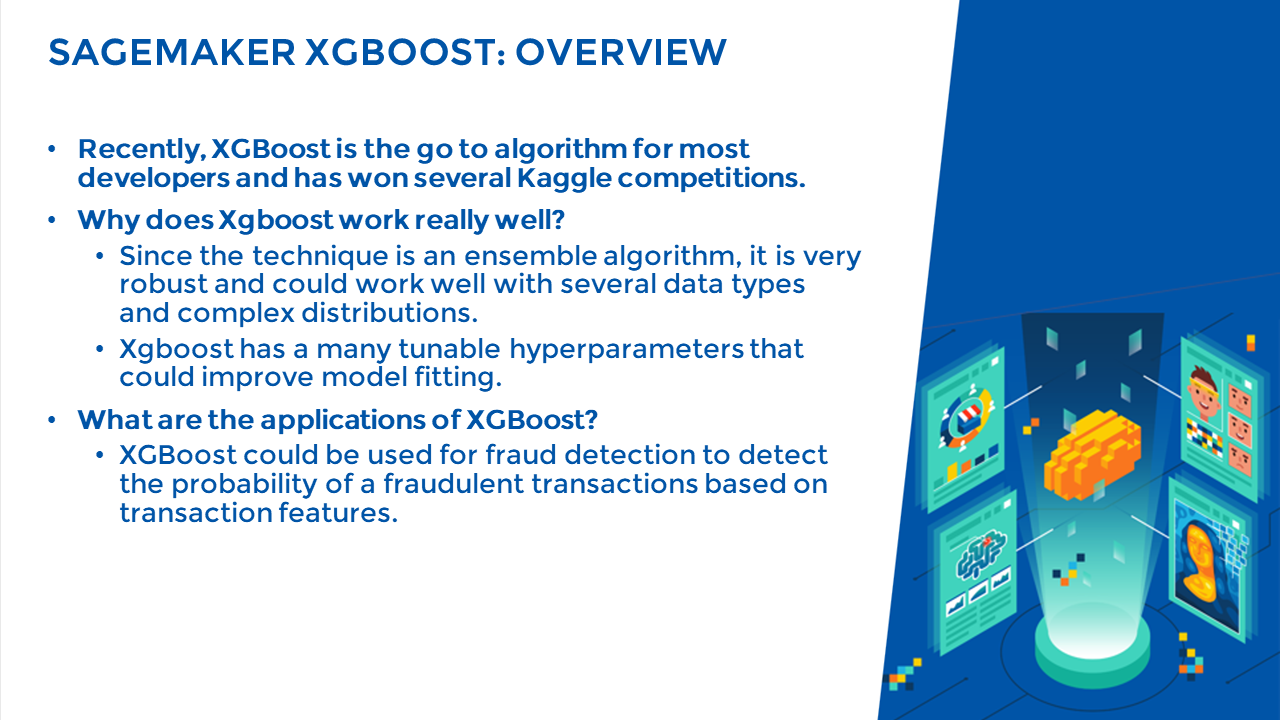

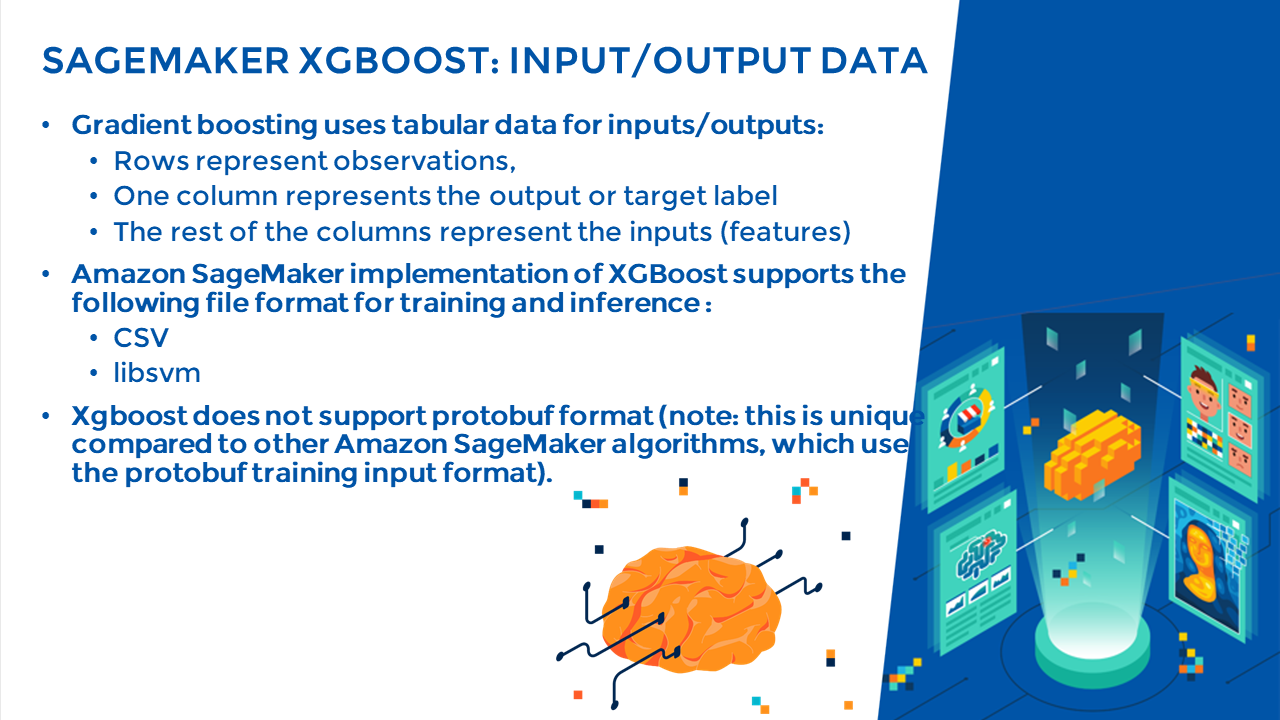

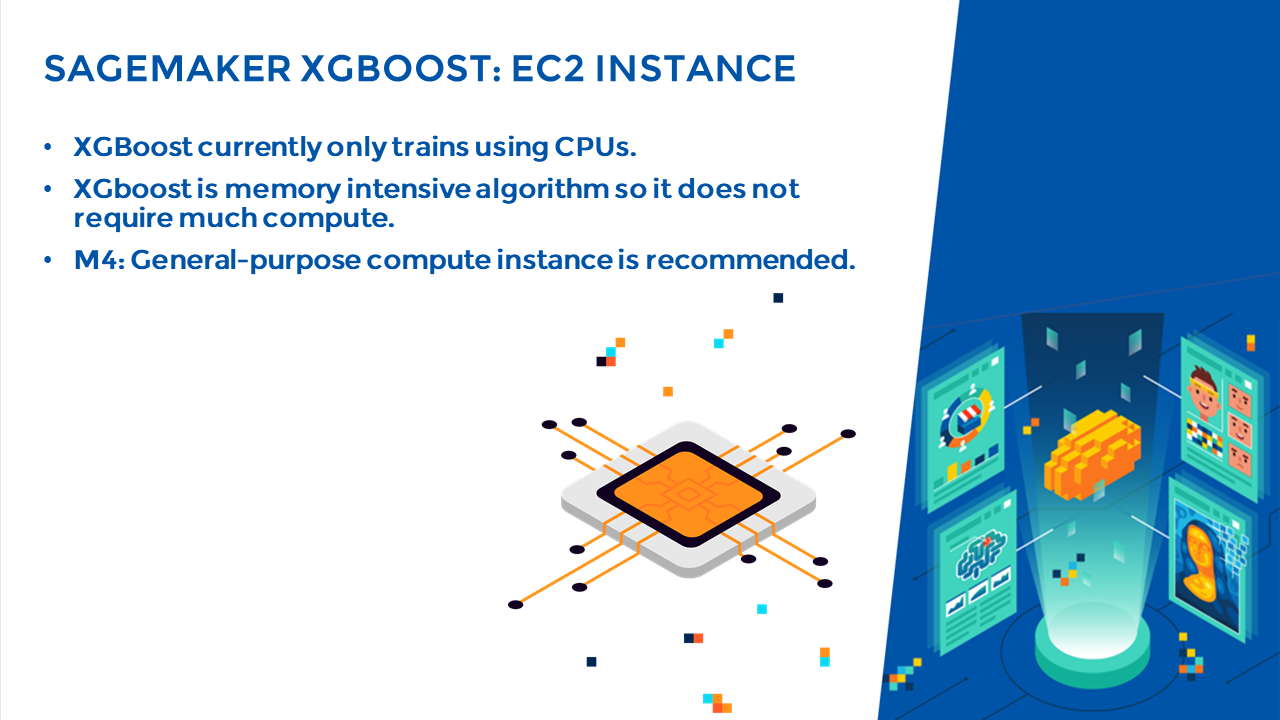

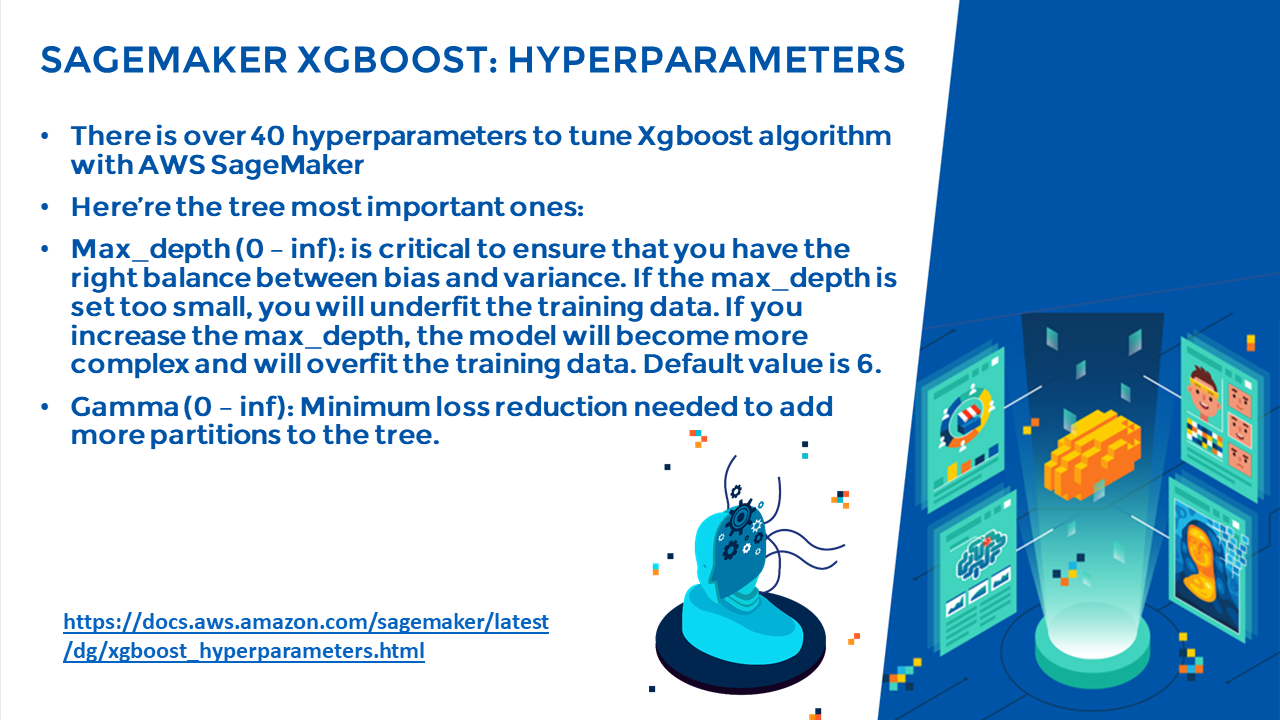

## 8) Train using AWS SageMaker

In [110]:
# Dataset

X_train

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
26965,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7136,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,123087.0,124843.0,127431.0,130008.0,4278.0,4500.0,3700.0,3716.0,3768.0,4000.0
15286,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,102180.0,58554.0,59358.0,45266.0,2121.0,48345.0,1689.0,1516.0,1240.0,1211.0
11700,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,123294.0,81042.0,81225.0,79777.0,5224.0,5427.0,2830.0,3000.0,2900.0,2818.0
23644,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6791.0,6495.0,5093.0,5503.0,14518.0,6835.0,6535.0,5118.0,5529.0,10026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,61956.0,63228.0,64561.0,66025.0,2197.0,2500.0,2300.0,2350.0,2540.0,4920.0
5211,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,49543.0,19649.0,20064.0,19691.0,1200.0,50189.0,682.0,710.0,690.0,693.0
29485,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2644.0,1300.0,2644.0,0.0,1227.0,1000.0,1300.0,2644.0,0.0,55176.0
19142,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31236.0,66091.0,5800.0,5800.0,5000.0,10000.0,36091.0,5800.0,0.0,464.0


In [111]:
# AWS SageMaker has a format where the y data is on the first column, followed by the features

train_data = pd.DataFrame({'target': y_train})
for i in X_train.columns:
    train_data[i] = X_train[i]

train_data

,target,0,1,2,3,4,5,6,7,8,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
26965,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7136,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,123087.0,124843.0,127431.0,130008.0,4278.0,4500.0,3700.0,3716.0,3768.0,4000.0
15286,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,102180.0,58554.0,59358.0,45266.0,2121.0,48345.0,1689.0,1516.0,1240.0,1211.0
11700,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,123294.0,81042.0,81225.0,79777.0,5224.0,5427.0,2830.0,3000.0,2900.0,2818.0
23644,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6791.0,6495.0,5093.0,5503.0,14518.0,6835.0,6535.0,5118.0,5529.0,10026.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,61956.0,63228.0,64561.0,66025.0,2197.0,2500.0,2300.0,2350.0,2540.0,4920.0
5211,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,49543.0,19649.0,20064.0,19691.0,1200.0,50189.0,682.0,710.0,690.0,693.0
29485,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2644.0,1300.0,2644.0,0.0,1227.0,1000.0,1300.0,2644.0,0.0,55176.0
19142,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,31236.0,66091.0,5800.0,5800.0,5000.0,10000.0,36091.0,5800.0,0.0,464.0


In [112]:
train_data.shape

(21600, 34)

In [113]:
val_data = pd.DataFrame({'target': y_val})
for i in X_test.columns:
    val_data[i] = X_val[i]

val_data

,target,0,1,2,3,4,5,6,7,8,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
29507,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3820.0,0.0,0.0,0.0,1127.0,3820.0,0.0,0.0,0.0,0.0
24031,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1096.0,162.0,6600.0,1780.0,945.0,1096.0,163.0,6600.0,1780.0,0.0
12755,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11899,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,6529.0,7533.0,7857.0,4424.0,2161.0,1000.0,1004.0,3004.0,1005.0,2006.0
27385,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,76305.0,77855.0,78961.0,80452.0,2653.0,3352.0,3413.0,3000.0,2919.0,2944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22619,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,33508.0,9506.0,8967.0,4326.0,877.0,33508.0,9506.0,8967.0,4326.0,5420.0
3358,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,83975.0,76842.0,78093.0,67557.0,4000.0,4000.0,8000.0,6000.0,0.0,2500.0
4339,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3429.0,0.0,0.0,749.0,552.0,5726.0,0.0,0.0,749.0,799.0
23583,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,189190.0,193018.0,188593.0,179309.0,6702.0,7000.0,7000.0,6500.0,6600.0,6230.0


In [114]:
val_data.shape

(2400, 34)

In [115]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [116]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Create a sagemaker session
sagemaker_session = sagemaker.Session()

#S 3 bucket and prefix that we want to use
# default_bucket - creates a Amazon S3 bucket to be used in this session
bucket = 'machinelearningcourse'
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [117]:
print(role)

arn:aws:iam::750471494546:role/service-role/AmazonSageMaker-ExecutionRole-20210927T223257


In [118]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://machinelearningcourse/XGBoost-Regressor/train/XGBoost-Regressor


In [119]:
# read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://machinelearningcourse/XGBoost-Regressor/validation/XGBoost-Regressor


In [120]:
# creates output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://machinelearningcourse/XGBoost-Regressor/output


In [121]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'xgboost','1.0-1') # Latest version of XGboost

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [88]:
grid.best_params_

{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 4, 'subsample': 1.0}

In [122]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.


Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                                   role, 
                                                   instance_count = 1, 
                                                   instance_type = 'ml.m4.xlarge',
                                                   output_path = output_location,
                                                   sagemaker_session = sagemaker_session)

#We can tune the hyper-parameters to improve the performance of the model

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                                       objective = 'binary:logistic',
                                       colsample_bytree = 1.0,
                                       gamma = 1.0,
                                       alpha = 10,
                                       eta = 0.7,
                                       min_child_weight = 15,
                                       num_round = 200
                                      )

In [123]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2021-09-29 10:25:36 Starting - Starting the training job...
2021-09-29 10:25:38 Starting - Launching requested ML instancesProfilerReport-1632911136: InProgress
...
2021-09-29 10:26:33 Starting - Preparing the instances for training............
2021-09-29 10:28:34 Downloading - Downloading input data
2021-09-29 10:28:34 Training - Downloading the training image.....INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[10:29:11] 21600x33 matrix with 712800 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&del

## 9) Deploy Model

In [124]:
# Deploy the model to perform inference 

Xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

------!

In [136]:
'''
Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data
in text/csv format, we specify this as content -type.

Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content
type

Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html
'''
from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_regressor.CONTENT_TYPE = 'text/csv'
Xgboost_regressor.serializer = csv_serializer
Xgboost_regressor.deserializer = None

In [141]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
6578,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,74731.0,0.0,0.0,0.0,0.0,74731.0,0.0,0.0
19164,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2131.0,2131.0,2131.0,0.0,3411.0,2131.0,2131.0,2131.0,0.0,5354.0
7351,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,85022.0,90779.0,84209.0,70162.0,7500.0,103.0,10000.0,0.0,3000.0,2000.0
4865,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,155871.0,193666.0,216666.0,18871.0,59201.0,35000.0,54461.0,46666.0,18871.0,0.0
2888,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7313.0,8036.0,3949.0,26984.0,2017.0,2000.0,1200.0,100.0,26984.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14584,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1769.0,2582.0,3184.0,3974.0,1000.0,1769.0,1000.0,800.0,1000.0,4000.0
6327,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8114.0,7835.0,8605.0,10948.0,2000.0,900.0,0.0,900.0,2500.0,0.0
22550,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,34699.0,30869.0,29890.0,29719.0,0.0,3511.0,0.0,1045.0,1066.0,1134.0
23288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1217.0,697.0,650.0,691.0,597.0,1223.0,700.0,653.0,691.0,17.0


In [142]:
X_test2 = X_test.reset_index()

In [143]:
X_test2

,index,0,1,2,3,4,5,6,7,8,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,6578,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,74731.0,0.0,0.0,0.0,0.0,74731.0,0.0,0.0
1,19164,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2131.0,2131.0,2131.0,0.0,3411.0,2131.0,2131.0,2131.0,0.0,5354.0
2,7351,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,85022.0,90779.0,84209.0,70162.0,7500.0,103.0,10000.0,0.0,3000.0,2000.0
3,4865,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,155871.0,193666.0,216666.0,18871.0,59201.0,35000.0,54461.0,46666.0,18871.0,0.0
4,2888,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7313.0,8036.0,3949.0,26984.0,2017.0,2000.0,1200.0,100.0,26984.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,14584,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1769.0,2582.0,3184.0,3974.0,1000.0,1769.0,1000.0,800.0,1000.0,4000.0
5996,6327,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,8114.0,7835.0,8605.0,10948.0,2000.0,900.0,0.0,900.0,2500.0,0.0
5997,22550,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,34699.0,30869.0,29890.0,29719.0,0.0,3511.0,0.0,1045.0,1066.0,1134.0
5998,23288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1217.0,697.0,650.0,691.0,597.0,1223.0,700.0,653.0,691.0,17.0


In [144]:
# Make Predictions

XGB_prediction = Xgboost_regressor.predict(X_test2)

AttributeError: 'NoneType' object has no attribute 'ACCEPT'

In [145]:
Xgboost_regressor.delete_endpoint()